# MPS Data Analysis
## Introduction
This notebook aims to analyze crime data from the Metropolitan Police Service (MPS). The analysis will cover historical and recent crime data at borough, ward, and LSOA levels. I will explore temporal and geographical crime patterns, apply machine learning techniques, and develop predictive models.


1. Load Libraries

Fit s e import the necessary librarieExplanation:
pandas: Used for data manipulation and analysis.
numpy: Provides support for large arrays and matrices.
matplotlib.pyplot: A plotting library for creating static, animated, and interactive visualizations.
seaborn: Built on top of matplotlib, provides a high-level interface for drawing attractive and informative statistical graphics.
sklearn.model_selection.train_test_split: Used to split the dataset into training and testing sets.
sklearn.linear_model.LinearRegression: Used for fitting a linear model.
sklearn.cluster.MiniBatchKMeans: An efficient way to perform k-means clustering on large datasets.
sklearn.preprocessing.StandardScaler: Standardizes features by removing the mean and scaling to unit variance.
sklearn.metrics.mean_squared_error, r2_score: Metrics to evaluate the performance of regression models.

Benefit:
These libraries are essential for data analysis, visualization, and applying machine learning algorithms, providing a comprehensive toolkit for my project..s.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

2. Load Datasets

Load the MPS datasets.

Explanation:
This section loads the crime data from CSV files into pandas DataFrames.
It then prints the first few rows and summary information for each dataset to verify the data loading process.

Benefit:
Loading the data into DataFrames allows for easy manipulation and analysis. Printing the summary information helps in understanding the structure and content of the data..

In [5]:
# Load datasets
borough_crime_hist = pd.read_csv('MPS Borough Level Crime (Historical).csv')
borough_crime_recent = pd.read_csv('MPS Borough Level Crime (most recent 24 months).csv')
lsoa_crime_hist = pd.read_csv('MPS LSOA Level Crime (Historical).csv')
lsoa_crime_recent = pd.read_csv('MPS LSOA Level Crime (most recent 24 months).csv')
ward_crime_hist = pd.read_csv('MPS Ward Level Crime (Historical).csv')
ward_crime_recent = pd.read_csv('MPS Ward Level Crime (most recent 24 months).csv')



# Display the first few rows of each dataset
print("Borough Crime Historical Data:")
print(borough_crime_hist.head())
print("\nBorough Crime Recent Data:")
print(borough_crime_recent.head())
print("\nLSOA Crime Historical Data:")
print(lsoa_crime_hist.head())
print("\nLSOA Crime Recent Data:")
print(lsoa_crime_recent.head())
print("\nWard Crime Historical Data:")
print(ward_crime_hist.head())
print("\nWard Crime Recent Data:")
print(ward_crime_recent.head())

# Display summary information
print("\nBorough Crime Historical Data Info:")
print(borough_crime_hist.info())
print("\nBorough Crime Recent Data Info:")
print(borough_crime_recent.info())
print("\nLSOA Crime Historical Data Info:")
print(lsoa_crime_hist.info())
print("\nLSOA Crime Recent Data Info:")
print(lsoa_crime_recent.info())
print("\nWard Crime Historical Data Info:")
print(ward_crime_hist.info())
print("\nWard Crime Recent Data Info:")
print(ward_crime_recent.info())

Borough Crime Historical Data:
                   MajorText                        MinorText  \
0  ARSON AND CRIMINAL DAMAGE                            ARSON   
1  ARSON AND CRIMINAL DAMAGE                  CRIMINAL DAMAGE   
2                   BURGLARY  BURGLARY BUSINESS AND COMMUNITY   
3                   BURGLARY           BURGLARY IN A DWELLING   
4              DRUG OFFENCES              POSSESSION OF DRUGS   

            BoroughName  201004  201005  201006  201007  201008  201009  \
0  Barking and Dagenham       6       5      11      10       6       6   
1  Barking and Dagenham     204     190     218     217     203     161   
2  Barking and Dagenham      48      58      58      46      46      51   
3  Barking and Dagenham     116     102     124     137     153     136   
4  Barking and Dagenham      76      64      82      72      98      87   

   201010  ...  202107  202108  202109  202110  202111  202112  202201  \
0      13  ...       3      12       5       7       

In [5]:
# Convert wide format to long format for Borough Crime Historical Data
borough_crime_hist_long = pd.melt(borough_crime_hist, id_vars=['MajorText', 'MinorText', 'BoroughName'], var_name='Date', value_name='CrimeCount')

borough_crime_recent_long = pd.melt(borough_crime_recent, id_vars=['MajorText', 'MinorText', 'BoroughName'], var_name='Date', value_name='CrimeCount')

lsoa_crime_hist_long = pd.melt(lsoa_crime_hist, id_vars=['LSOA Code', 'LSOA Name', 'Borough', 'Major Category', 'Minor Category'], var_name='Date', value_name='CrimeCount')

lsoa_crime_recent_long = pd.melt(lsoa_crime_recent, id_vars=['LSOA Code', 'LSOA Name', 'Borough', 'Major Category', 'Minor Category'], var_name='Date', value_name='CrimeCount')

ward_crime_hist_long = pd.melt(ward_crime_hist, id_vars=['WardName', 'WardCode', 'MajorText', 'MinorText', 'LookUp_BoroughName'], var_name='Date', value_name='CrimeCount')

ward_crime_recent_long = pd.melt(ward_crime_recent, id_vars=['WardName', 'WardCode', 'MajorText', 'MinorText', 'LookUp_BoroughName'], var_name='Date', value_name='CrimeCount')

# Display the first few rows of the reshaped data
print("Borough Crime Historical Data (Long Format):")
print(borough_crime_hist_long.head())

print("Borough Crime Recent Data (Long Format):")
print(borough_crime_recent_long.head())

print("\nLSOA Crime Historical Data (Long Format):")
print(lsoa_crime_hist_long.head())

print("\nLSOA Crime Recent Data (Long Format):")
print(lsoa_crime_recent_long.head())

print("\nWard Crime Historical Data (Long Format):")
print(ward_crime_hist_long.head())

print("\nWard Crime Recent Data (Long Format):")
print(ward_crime_recent_long.head())

Borough Crime Historical Data (Long Format):
                   MajorText                        MinorText  \
0  ARSON AND CRIMINAL DAMAGE                            ARSON   
1  ARSON AND CRIMINAL DAMAGE                  CRIMINAL DAMAGE   
2                   BURGLARY  BURGLARY BUSINESS AND COMMUNITY   
3                   BURGLARY           BURGLARY IN A DWELLING   
4              DRUG OFFENCES              POSSESSION OF DRUGS   

            BoroughName    Date  CrimeCount  
0  Barking and Dagenham  201004           6  
1  Barking and Dagenham  201004         204  
2  Barking and Dagenham  201004          48  
3  Barking and Dagenham  201004         116  
4  Barking and Dagenham  201004          76  
Borough Crime Recent Data (Long Format):
                   MajorText                        MinorText  \
0  ARSON AND CRIMINAL DAMAGE                            ARSON   
1  ARSON AND CRIMINAL DAMAGE                  CRIMINAL DAMAGE   
2                   BURGLARY           BURGLARY - RE

4. Data Cleaning

Explanation:
Pivot the data: Converts wide-format data to long-format for easier analysis.
Convert Date to datetime format: Ensures the date is in a standard format for time series analysis.
Fill missing values: Uses forward-fill and backward-fill methods to handle missing data, ensuring no gaps in the dataset.
Drop duplicates: Removes any duplicate rows to maintain data integrity.

Benefit:
Cleaning the data ensures consistency and accuracy, which is crucial for reliable analysis and modeling.

In [7]:
# Pivot the data to long format

borough_crime_hist_long = pd.melt(borough_crime_hist, id_vars=['MajorText', 'MinorText', 'BoroughName'], 
                                  var_name='Date', value_name='CrimeCount')
borough_crime_recent_long = pd.melt(borough_crime_recent, id_vars=['MajorText', 'MinorText', 'BoroughName'], 
                                    var_name='Date', value_name='CrimeCount')
lsoa_crime_hist_long = pd.melt(lsoa_crime_hist, id_vars=['LSOA Code', 'LSOA Name', 'Borough', 
                                                         'Major Category', 'Minor Category'], 
                               var_name='Date', value_name='CrimeCount')
lsoa_crime_recent_long = pd.melt(lsoa_crime_recent, id_vars=['LSOA Code', 'LSOA Name', 'Borough', 
                                                             'Major Category', 'Minor Category'], 
                                 var_name='Date', value_name='CrimeCount')
ward_crime_hist_long = pd.melt(ward_crime_hist, id_vars=['WardName', 'WardCode', 'MajorText', 
                                                         'MinorText', 'LookUp_BoroughName'], 
                               var_name='Date', value_name='CrimeCount')
ward_crime_recent_long = pd.melt(ward_crime_recent, id_vars=['MajorText', 'MinorText', 'WardName', 
                                                             'WardCode', 'LookUp_BoroughName'], 
                                 var_name='Date', value_name='CrimeCount')

# Convert Date to datetime format
for df in [borough_crime_hist_long, borough_crime_recent_long, lsoa_crime_hist_long, 
           lsoa_crime_recent_long, ward_crime_hist_long, ward_crime_recent_long]:
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')

# Fill missing values
datasets = [borough_crime_hist_long, borough_crime_recent_long, lsoa_crime_hist_long, lsoa_crime_recent_long, ward_crime_hist_long, ward_crime_recent_long]

for i, dataset in enumerate(datasets):
    datasets[i] = dataset.fillna(method='ffill').fillna(method='bfill')
    datasets[i] = dataset.drop_duplicates()

# Reassign cleaned data
borough_crime_hist_long, borough_crime_recent_long, lsoa_crime_hist_long, lsoa_crime_recent_long, ward_crime_hist_long, ward_crime_recent_long = datasets

# Confirm cleaning
print("Missing values after cleaning:")
print(borough_crime_hist_long.isnull().sum())
print(borough_crime_recent_long.isnull().sum())
print(lsoa_crime_hist_long.isnull().sum())
print(lsoa_crime_recent_long.isnull().sum())
print(ward_crime_hist_long.isnull().sum())
print(ward_crime_recent_long.isnull().sum())


C:\Users\jeffo\AppData\Local\Temp\ipykernel_26080\1249806738.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datasets[i] = dataset.fillna(method='ffill').fillna(method='bfill')


Missing values after cleaning:
MajorText      0
MinorText      0
BoroughName    0
Date           0
CrimeCount     0
dtype: int64
MajorText      0
MinorText      0
BoroughName    0
Date           0
CrimeCount     0
dtype: int64
LSOA Code         0
LSOA Name         0
Borough           0
Major Category    0
Minor Category    0
Date              0
CrimeCount        0
dtype: int64
LSOA Code         0
LSOA Name         0
Borough           0
Major Category    0
Minor Category    0
Date              0
CrimeCount        0
dtype: int64
WardName              0
WardCode              0
MajorText             0
MinorText             0
LookUp_BoroughName    0
Date                  0
CrimeCount            0
dtype: int64
MajorText             0
MinorText             0
WardName              0
WardCode              0
LookUp_BoroughName    0
Date                  0
CrimeCount            0
dtype: int64


5. Exploratory Data Analysis (EDA)

Perform statistical analysis and visualize the data.

Explanation: This code defines a function to plot crime trends over time by grouping the data by the date column and summing the crime counts. It then plots the data to visualize trends for each dataset.

Benefits: Visualizing crime trends over time helps identify patterns, such as increases or decreases in crime rates, seasonal variations, and potential outliers. This is crucial for understanding the dynamics of crime in different areas.

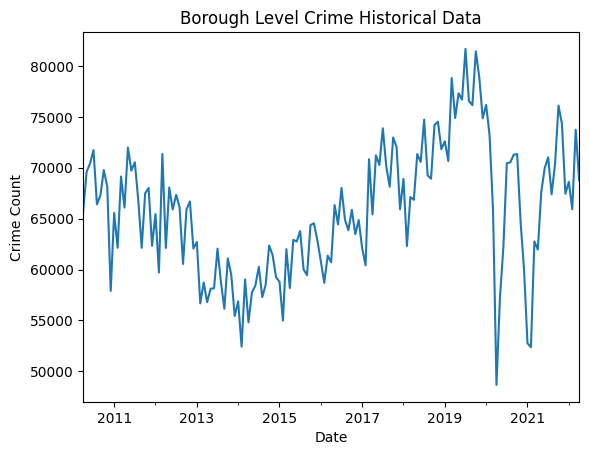

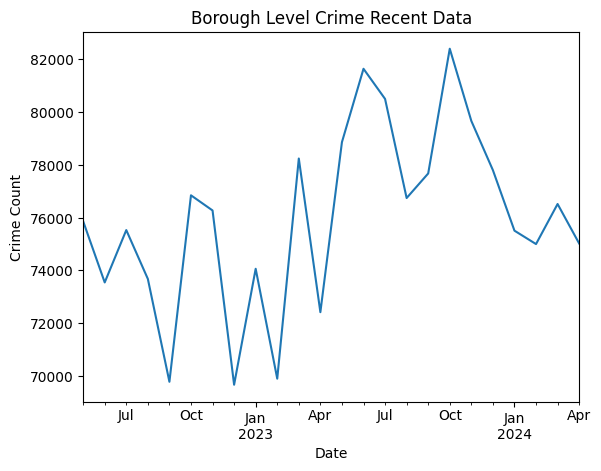

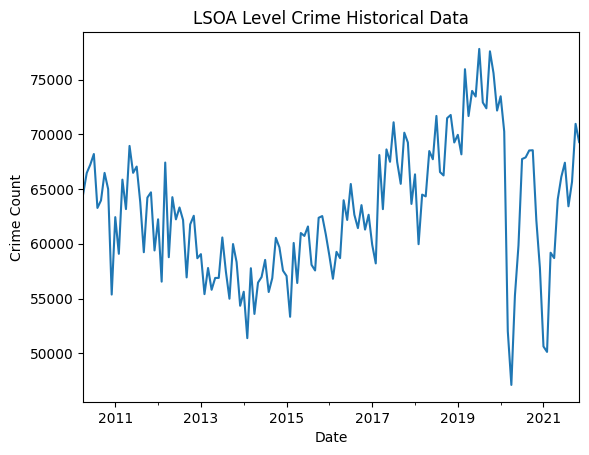

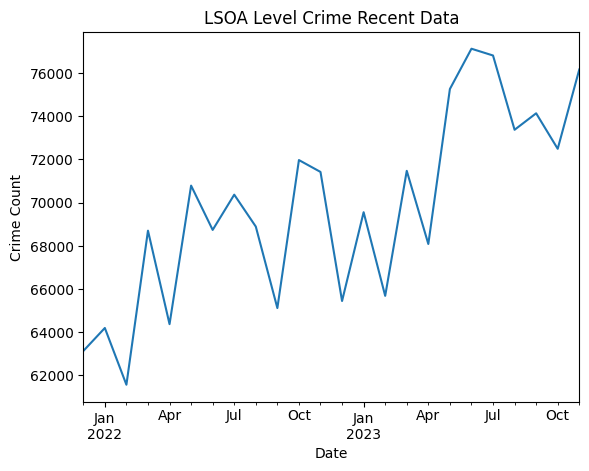

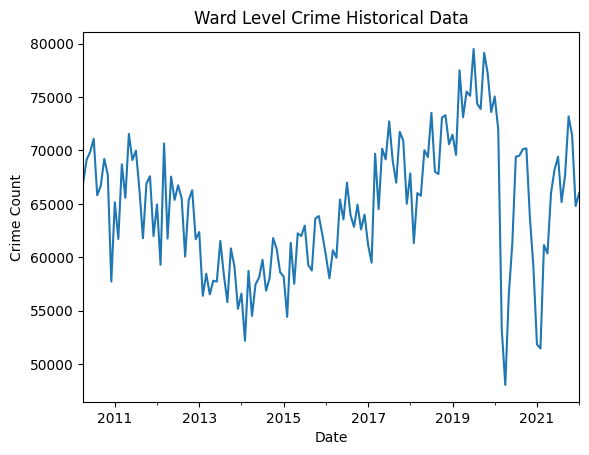

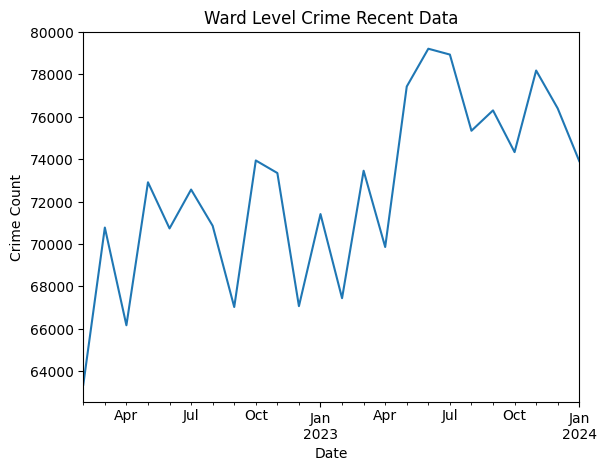

In [7]:
# Function to plot crime trends over time
def plot_crime_trends(data, date_column, count_column, title):
    data[date_column] = pd.to_datetime(data[date_column], format='%Y%m')
    data.groupby(date_column)[count_column].sum().plot()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Crime Count')
    plt.show()

# Example plot for Borough Level Crime Historical Data
plot_crime_trends(borough_crime_hist_long, 'Date', 'CrimeCount', 'Borough Level Crime Historical Data')

# Add more plots for other datasets similarly
plot_crime_trends(borough_crime_recent_long, 'Date', 'CrimeCount', 'Borough Level Crime Recent Data')
plot_crime_trends(lsoa_crime_hist_long, 'Date', 'CrimeCount', 'LSOA Level Crime Historical Data')
plot_crime_trends(lsoa_crime_recent_long, 'Date', 'CrimeCount', 'LSOA Level Crime Recent Data')
plot_crime_trends(ward_crime_hist_long, 'Date', 'CrimeCount', 'Ward Level Crime Historical Data')
plot_crime_trends(ward_crime_recent_long, 'Date', 'CrimeCount', 'Ward Level Crime Recent Data')

6. Supervised Learning: Predictive Models for Future Crime Rates

Explanation

Benefits:    Borough Level: Provides insights into trends and allows for resource allocation at a broader city le
v
    LSOA Level: Offers more granular insights, beneficial for community policing and targeted intervent
i
    Ward Level: Helps in understanding trends at a very local level, which can inform neighborhood safety plans.

Explanation

Benefits:    Mean Squared Error (MSE): Provides a measure of the average squared difference between actual and predicted values. Lower values indicate better model performa
n
    R^2 Score: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). Higher values (closer to 1) indicate better model perform

Explanation:

Extract the year: Derives the year from the Date column to use as a feature.
Train-test split: Splits the data into training and testing sets.
Model training: Trains a Linear Regression model on the training data.
Predictions: Uses the trained model to make predictions on the test data.
Model evaluation: Evaluates the model using Mean Squared Error and R^2 Score.

Benefit:
Supervised learning helps in predicting future crime trends based on historical data, which is valuable for planning and resource allocation.ance.

Example using Borough Crime Historical Data

In [21]:
# Borough Crime Historical Data
borough_crime_hist_long['Year'] = pd.to_datetime(borough_crime_hist_long['Date'], format='%Y%m').dt.year
X_borough = borough_crime_hist_long[['Year']]  # Features
y_borough = borough_crime_hist_long['CrimeCount']  # Target

# Train-test split
X_train_borough, X_test_borough, y_train_borough, y_test_borough = train_test_split(X_borough, y_borough, test_size=0.2, random_state=42)

# Model training
model_borough = LinearRegression()
model_borough.fit(X_train_borough, y_train_borough)

# Predictions
y_pred_borough = model_borough.predict(X_test_borough)

# Model evaluation
print(f"Borough Mean Squared Error: {mean_squared_error(y_test_borough, y_pred_borough)}")
print(f"Borough R^2 Score: {r2_score(y_test_borough, y_pred_borough)}")

Borough Mean Squared Error: 10451.504019069886
Borough R^2 Score: 0.0002905864341563591


Example using LSOA Crime Historical Data

In [22]:
# LSOA Crime Historical Data
lsoa_crime_hist_long['Year'] = pd.to_datetime(lsoa_crime_hist_long['Date'], format='%Y%m').dt.year
X_lsoa = lsoa_crime_hist_long[['Year']]  # Features
y_lsoa = lsoa_crime_hist_long['CrimeCount']  # Target

# Train-test split
X_train_lsoa, X_test_lsoa, y_train_lsoa, y_test_lsoa = train_test_split(X_lsoa, y_lsoa, test_size=0.2, random_state=42)

# Model training
model_lsoa = LinearRegression()
model_lsoa.fit(X_train_lsoa, y_train_lsoa)

# Predictions
y_pred_lsoa = model_lsoa.predict(X_test_lsoa)

# Model evaluation
print(f"LSOA Mean Squared Error: {mean_squared_error(y_test_lsoa, y_pred_lsoa)}")
print(f"LSOA R^2 Score: {r2_score(y_test_lsoa, y_pred_lsoa)}")


LSOA Mean Squared Error: 3.296410020439215
LSOA R^2 Score: 4.045612627578965e-05


Example using Ward Crime Historical Data

In [23]:
# Ward Crime Historical Data
ward_crime_hist_long['Year'] = pd.to_datetime(ward_crime_hist_long['Date'], format='%Y%m').dt.year
X_ward = ward_crime_hist_long[['Year']]  # Features
y_ward = ward_crime_hist_long['CrimeCount']  # Target

# Train-test split
X_train_ward, X_test_ward, y_train_ward, y_test_ward = train_test_split(X_ward, y_ward, test_size=0.2, random_state=42)

# Model training
model_ward = LinearRegression()
model_ward.fit(X_train_ward, y_train_ward)

# Predictions
y_pred_ward = model_ward.predict(X_test_ward)

# Model evaluation
print(f"Ward Mean Squared Error: {mean_squared_error(y_test_ward, y_pred_ward)}")
print(f"Ward R^2 Score: {r2_score(y_test_ward, y_pred_ward)}")


Ward Mean Squared Error: 48.324757000559444
Ward R^2 Score: 5.4284740907739604e-05


7. Unsupervised Learning

Example using Borough Crime Historical Data

Explanation

Benefits:    Crime Hotspots: Identifying clusters helps in pinpointing areas with higher crime rates, which are critical for hotspot policing strateg
i
    Resource Allocation: Helps in efficient allocation of resources to areas with higher crime incid
e
    Pattern Recognition: Clustering aids in recognizing patterns that may not be evident from raw data alo



Explanation:

Standardize features: Uses StandardScaler to standardize the CrimeCount feature, which is important for clustering algorithms to work effectively.
MiniBatchKMeans Clustering: Applies the MiniBatchKMeans algorithm for clustering, which is more efficient than standard KMeans for large datasets.
Plot clusters: Visualizes the clusters by plotting Date against CrimeCount, with colors representing different clusters.

Benefit:
Unsupervised learning, specifically clustering, helps in identifying patterns and groupings within the crime data, which can be useful for detecting crime hotspots and similar behavior across different regions.ne.

Borough Crime Historical Data Clustering

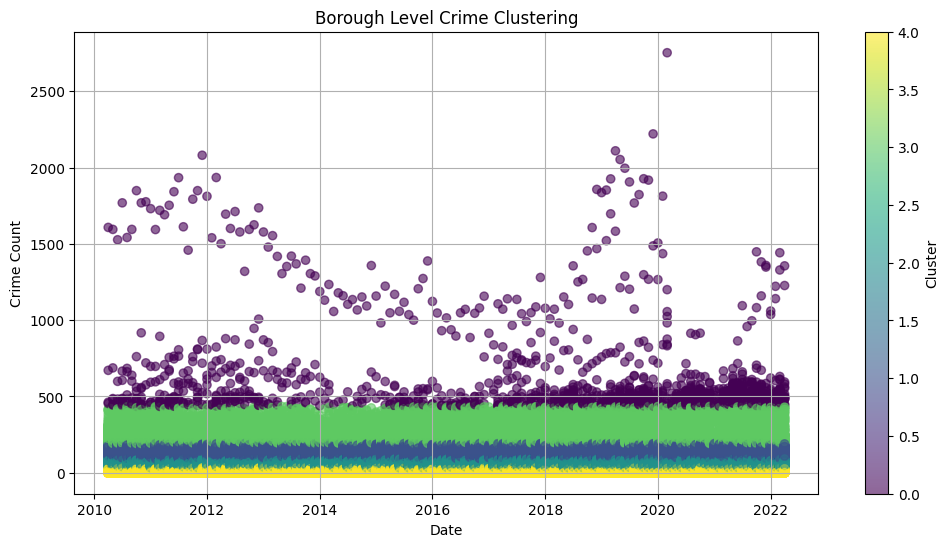

In [9]:
# Standardize features for clustering
X_borough_scaled = scaler.fit_transform(borough_crime_hist_long[['CrimeCount']])

# Apply MiniBatchKMeans Clustering
kmeans_borough = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=100)
borough_crime_hist_long['Cluster'] = kmeans_borough.fit_predict(X_borough_scaled)

# Plot clusters
plt.figure(figsize=(12, 6))
plt.scatter(borough_crime_hist_long['Date'], borough_crime_hist_long['CrimeCount'], c=borough_crime_hist_long['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Borough Level Crime Clustering')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


LSOA Crime Historical Data Clustering

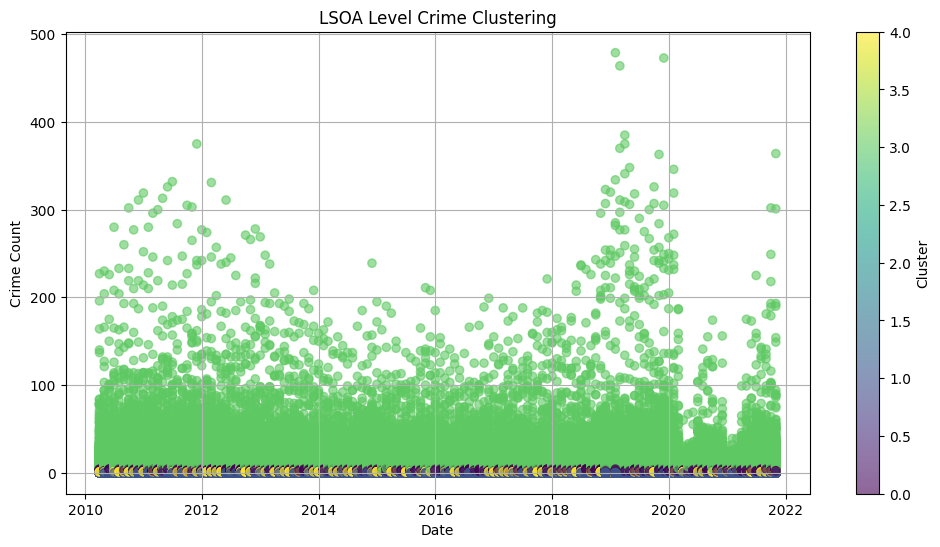

In [11]:
# Standardize features for clustering
X_lsoa_scaled = scaler.fit_transform(lsoa_crime_hist_long[['CrimeCount']])

# Apply MiniBatchKMeans Clustering
kmeans_lsoa = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=100)
lsoa_crime_hist_long['Cluster'] = kmeans_lsoa.fit_predict(X_lsoa_scaled)

# Plot clusters
plt.figure(figsize=(12, 6))
plt.scatter(lsoa_crime_hist_long['Date'], lsoa_crime_hist_long['CrimeCount'], c=lsoa_crime_hist_long['Cluster'], cmap='viridis', alpha=0.6)
plt.title('LSOA Level Crime Clustering')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

Ward Crime Historical Data Clustering

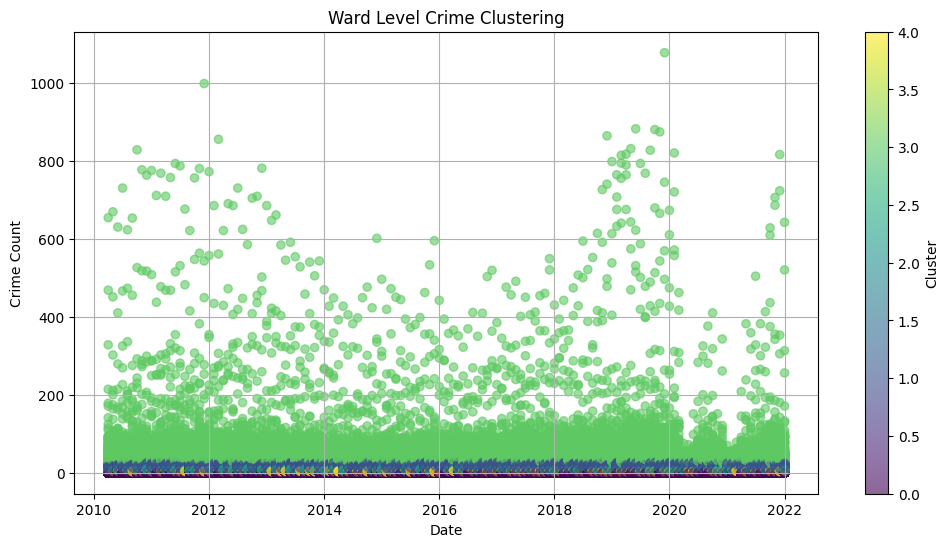

In [13]:
# Standardize features for clustering
X_ward_scaled = scaler.fit_transform(ward_crime_hist_long[['CrimeCount']])

# Apply MiniBatchKMeans Clustering
kmeans_ward = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=100)
ward_crime_hist_long['Cluster'] = kmeans_ward.fit_predict(X_ward_scaled)

# Plot clusters
plt.figure(figsize=(12, 6))
plt.scatter(ward_crime_hist_long['Date'], ward_crime_hist_long['CrimeCount'], c=ward_crime_hist_long['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Ward Level Crime Clustering')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


In [27]:
# Supervised Learning: Predictive Models for Future Crime Rates
# Example using Borough Crime Historical Data
borough_crime_hist_long['Year'] = pd.to_datetime(borough_crime_hist_long['Date'], format='%Y/%m').dt.year
X_borough = borough_crime_hist_long[['Year']]  # Features
y_borough = borough_crime_hist_long['CrimeCount']  # Target

# Train-test split
X_train_borough, X_test_borough, y_train_borough, y_test_borough = train_test_split(X_borough, y_borough, test_size=0.2, random_state=42)

# Model training
model_borough = LinearRegression()
model_borough.fit(X_train_borough, y_train_borough)

# Model evaluation
y_pred_borough = model_borough.predict(X_test_borough)
mse_borough = mean_squared_error(y_test_borough, y_pred_borough)
r2_borough = r2_score(y_test_borough, y_pred_borough)

print(f"Borough Mean Squared Error: {mse_borough}")
print(f"Borough R^2 Score: {r2_borough}")

# Example using LSOA Crime Historical Data
lsoa_crime_hist_long['Year'] = pd.to_datetime(lsoa_crime_hist_long['Date'], format='%Y/%m').dt.year
X_lsoa = lsoa_crime_hist_long[['Year']]  # Features
y_lsoa = lsoa_crime_hist_long['CrimeCount']  # Target

# Train-test split
X_train_lsoa, X_test_lsoa, y_train_lsoa, y_test_lsoa = train_test_split(X_lsoa, y_lsoa, test_size=0.2, random_state=42)

# Model training
model_lsoa = LinearRegression()
model_lsoa.fit(X_train_lsoa, y_train_lsoa)

# Model evaluation
y_pred_lsoa = model_lsoa.predict(X_test_lsoa)
mse_lsoa = mean_squared_error(y_test_lsoa, y_pred_lsoa)
r2_lsoa = r2_score(y_test_lsoa, y_pred_lsoa)

print(f"LSOA Mean Squared Error: {mse_lsoa}")
print(f"LSOA R^2 Score: {r2_lsoa}")

# Example using Ward Crime Historical Data
ward_crime_hist_long['Year'] = pd.to_datetime(ward_crime_hist_long['Date'], format='%Y/%m').dt.year
X_ward = ward_crime_hist_long[['Year']]  # Features
y_ward = ward_crime_hist_long['CrimeCount']  # Target

# Train-test split
X_train_ward, X_test_ward, y_train_ward, y_test_ward = train_test_split(X_ward, y_ward, test_size=0.2, random_state=42)

# Model training
model_ward = LinearRegression()
model_ward.fit(X_train_ward, y_train_ward)

# Model evaluation
y_pred_ward = model_ward.predict(X_test_ward)
mse_ward = mean_squared_error(y_test_ward, y_pred_ward)
r2_ward = r2_score(y_test_ward, y_pred_ward)

print(f"Ward Mean Squared Error: {mse_ward}")
print(f"Ward R^2 Score: {r2_ward}")


Borough Mean Squared Error: 10451.504019069886
Borough R^2 Score: 0.0002905864341563591
LSOA Mean Squared Error: 3.296410020439215
LSOA R^2 Score: 4.045612627578965e-05
Ward Mean Squared Error: 48.324757000559444
Ward R^2 Score: 5.4284740907739604e-05


In [28]:
# Comparing Clusters (Unsupervised Learning)
print("Unsupervised Learning (Clustering) Results:")
print("Borough Level Clusters")
print(borough_crime_hist_long['Cluster'].value_counts())

print("LSOA Level Clusters")
print(lsoa_crime_hist_long['Cluster'].value_counts())

print("Ward Level Clusters")
print(ward_crime_hist_long['Cluster'].value_counts())

Unsupervised Learning (Clustering) Results:
Borough Level Clusters
Cluster
4    68893
2    28904
1    23958
3    11977
0     1263
Name: count, dtype: int64
LSOA Level Clusters
Cluster
1    17159758
4     2531005
0     1514983
3      277674
Name: count, dtype: int64
Ward Level Clusters
Cluster
0    3032452
4     539145
2     363071
1     238355
3      27621
Name: count, dtype: int64


8. Comparison and Interpretation

In [29]:
# Print Model Evaluation Metrics for Supervised Learning
print("Supervised Learning (Linear Regression) Results:")
print(f"Borough Level - Mean Squared Error: {mse_borough}")
print(f"Borough Level - R^2 Score: {r2_borough}")

print(f"LSOA Level - Mean Squared Error: {mse_lsoa}")
print(f"LSOA Level - R^2 Score: {r2_lsoa}")

print(f"Ward Level - Mean Squared Error: {mse_ward}")
print(f"Ward Level - R^2 Score: {r2_ward}")

# Comparing Clusters (Unsupervised Learning)
print("Unsupervised Learning (Clustering) Results:")
print("Borough Level Clusters")
print(borough_crime_hist_long['Cluster'].value_counts())

print("LSOA Level Clusters")
print(lsoa_crime_hist_long['Cluster'].value_counts())

print("Ward Level Clusters")
print(ward_crime_hist_long['Cluster'].value_counts())

Supervised Learning (Linear Regression) Results:
Borough Level - Mean Squared Error: 10451.504019069886
Borough Level - R^2 Score: 0.0002905864341563591
LSOA Level - Mean Squared Error: 3.296410020439215
LSOA Level - R^2 Score: 4.045612627578965e-05
Ward Level - Mean Squared Error: 48.324757000559444
Ward Level - R^2 Score: 5.4284740907739604e-05
Unsupervised Learning (Clustering) Results:
Borough Level Clusters
Cluster
4    68893
2    28904
1    23958
3    11977
0     1263
Name: count, dtype: int64
LSOA Level Clusters
Cluster
1    17159758
4     2531005
0     1514983
3      277674
Name: count, dtype: int64
Ward Level Clusters
Cluster
0    3032452
4     539145
2     363071
1     238355
3      27621
Name: count, dtype: int64
